 # Predicting heart disease using machine learning
 
 This jupyter notebook uses python machine learning and data science libraries in order to build a machine learning model that can predict if someone has a heart disease or not based on medical attributes
 
 Approach: 
 1. Problem definition
 2. Data
 3. Evaluation
 4. Features
 5. Modelling 
 6. Experimentation

# 1. Problem definition

We are doing binary classification, that means we are prediction whether or not someone has a heart disease. Can it be made using a classification machine learning model?

# 2. Data

Data comes from Kaggle, it is a version of the Cleaveland UCI Machine Learning Repository. 
https://www.kaggle.com/rotnif/heart-disease-uci

# 3. Evaluation
> We are interested in building a high accuracy project given the problem in which
95% or more accuracy will be the target.

# 4. Features

***Data dictionary***
* age in years
* sex ( 1 = male; 0 = female)
* cp chest pain type
* trestbpsrtesting blood pressure (in mmHg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs ( fasting blood sugar > 120 mg/dl) ( 1 = true, 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes, 0 = no)
* oldpeakST deppresion induced by excercise relative to rest
* slopethe slope of the peak excercise ST segment
* canumber of major vessels (0-3) colored by flouroscopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

We are going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [4]:
#Import all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# we will paint our plots inside the notebook
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

In [5]:
##Load data
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# 0 = no heart disease and 1 = heart disease
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

[Text(0, 0, 'heart disease'), Text(1, 0, 'no heart disease')]

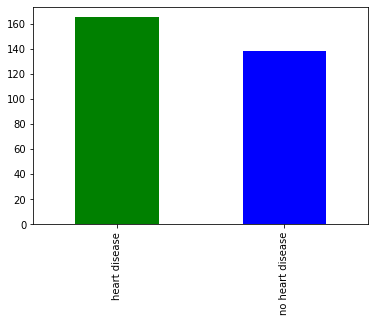

In [8]:
#We have relatively the same amout of values for each type - balanced classification model
ax = df["target"].value_counts().plot(kind = "bar", color = ["green", "blue"])
ax.set_xticklabels(["heart disease", "no heart disease"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum() #Are there any missing values?

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We need to get an intuition of how the different parameters affect on the target

## Sex - Target

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
#There are much more man than women in the data
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


We might think women are more probable to get a heart disease than men.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

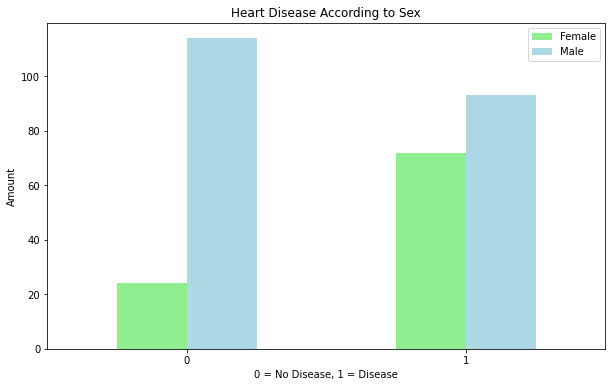

In [21]:
#Plot of the upper crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                   figsize = (10,6),
                                   color = ["lightgreen", "lightblue"] )
plt.title("Heart Disease According to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

## Heart Rate and Age vs Target

***Comparing a couple of independent values.***

***Max heart rate achieved and Age vs Heart Disease***

Text(0, 0.5, 'Heart Rate')

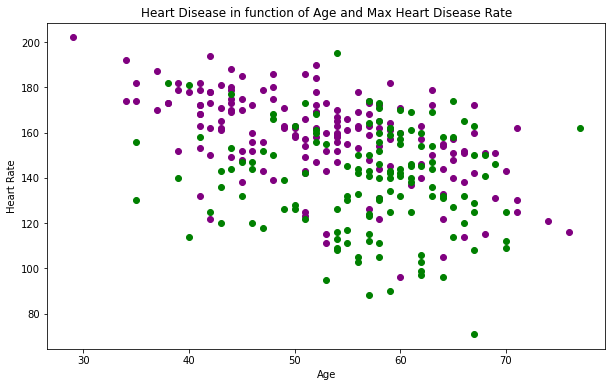

In [30]:
plt.figure(figsize = (10,6))

#Scatter with positive example
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "purple") #Heart Disease
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "green") #No Heart Disease

plt.title("Heart Disease in function of Age and Max Heart Disease Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")

The younger someone is the higher the heart rate, seems to be ordered that way but it is difficult to extract any valuable information from just seeing the scatter plot.

54.366336633663366

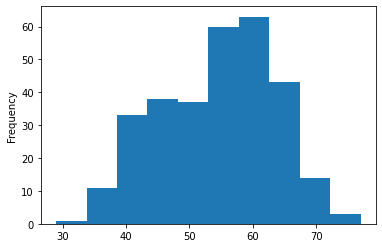

In [32]:
#Check the age distribution 
df.age.plot.hist(); #It seems to be a Normal distribution with mean around 57
#No outliers at this point

## Chest Pain vs Target

In [34]:
pd.crosstab(df.cp, df.target) #Cp is chest pain type.

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


'\n0: Typical angina -> Related decrease blood supply to the heart\n1: Atypical angina -> not related to heart\n2: Non-anginal pain -> esophageal spasms \n3: Asymptomatic -> not showing signs of disease\n'

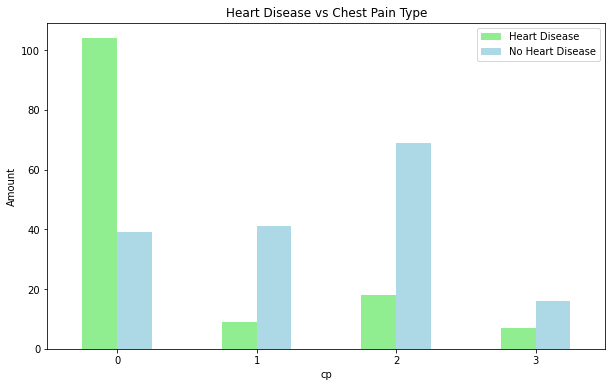

In [46]:
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize= (10, 6),
                                 color = ["lightgreen", "lightblue"])
plt.title("Heart Disease vs Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation = 0)
plt.legend(["Heart Disease", "No Heart Disease"])
'''
0: Typical angina -> Related decrease blood supply to the heart
1: Atypical angina -> not related to heart
2: Non-anginal pain -> esophageal spasms 
3: Asymptomatic -> not showing signs of disease
'''